# Summary

In this Jupyter Notebook xarray and opendap are used to access [National Data Buoy Center](https://www.ndbc.noaa.gov/) data to compute the average climatology of waves by season on the east vs. west coast (Southern California) of the US. I do this using the following metrics:
1. Significant Wave Height ($H_{1/3}$)
2. Dominant wave period ($\tau$)
3. Wave energy flux ($c_g\left<E\right>$)

### Import Modules

If using Google Colab uncomment and run the next cell otherwise skip over to the next cell.

In [ ]:
# !pip install xarray
# !pip install netcdf4
# !pip install thredds_crawler

In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
import requests
import matplotlib.pyplot as plt
from thredds_crawler.crawl import Crawl

Define useful functions

In [ ]:
def include_criteria(filename):
  return filename.endswith('.nc')

def ndbc_buoy_urls(buoy):
  base_url = 'https://dods.ndbc.noaa.gov/thredds/catalog/data/stdmet/'
  directory_url = f"{base_url}{buoy}/catalog.html"
  c = Crawl(directory_url)

  fnames = [n.name for n in c.datasets]
  fnames_filt = [n for n in fnames if include_criteria(n)]
  fnames_new = [n for n in fnames_filt if n != f"{buoy}h9999.nc"]

  opendap_base = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'
  opendap_url = f"{opendap_base}{buoy}/"
  urls = [f"{opendap_base}{buoy}/{n}" for n in fnames_new]

  return urls

## Buoy Locations

To compare East coast vs. Southern California:
## East Coast
1. North Carolina, Northern Outer Banks: NDBC 44095 Oregon Inlet
2. Rhode Island: NDBC 44097 Block Island
## Southern California
1. California, San Diego: NDBC 46258 Mission Bay West
2. Califirnoa, Los

In [ ]:
buoys = ['44095', '44097', '46258', '46221']
station_name = ['Oregon Inlet (NC)', 'Block Island (RI)',
                'Mission Bay West (CA)', 'Santa Monica Bay (CA)']
urls = ndbc_buoy_urls(buoys[3])
urls

['https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2004.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2005.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2006.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2007.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2008.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2009.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2010.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2011.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2012.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2013.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2014.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2015.nc',
 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46221/46221h2016.nc',

In [ ]:
ds = xr.open_mfdataset(urls, drop_variables=["latitude", "longitude"])
ds

<xarray.Dataset>
Dimensions:                  (time: 298024, latitude: 1, longitude: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2004-09-08T16:00:00 ... 20...
Dimensions without coordinates: latitude, longitude
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    wind_spd                 (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    gust                     (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    wave_height              (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    average_wpd              (time, latitude, longitude) timedelta64[ns] dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    air_temperature          (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    sea_surface_temperature  (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    dewpt_temperature        (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    visibility               (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
    water_level              (time, latitude, longitude) float32 dask.array<chunksize=(2688, 1, 1), meta=np.ndarray>
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with manual editing ...
    conventions:                     COARDS
    station:                         46221
    comment:                         Santa Monica Bay, CA (028)
    location:                        33.85 N 118.63 W 
    DODS_EXTRA.Unlimited_Dimension:  time

In [ ]:
DPD = np.array(ds.dominant_wpd.squeeze()).astype(float)/1e9

In [ ]:
indx = np.where(DPD < 0)[0]
DPD[indx] = np.nan

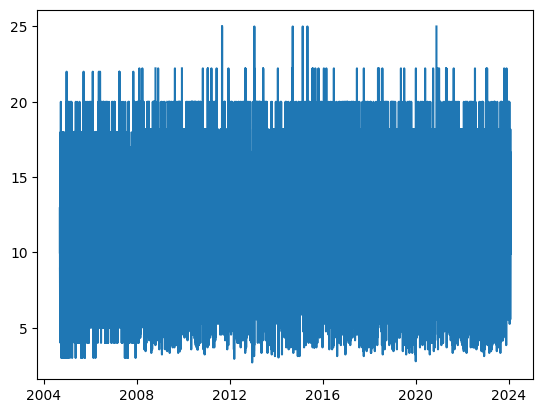

In [ ]:
# DPD.plot()
# plt.plot(DPD)
plt.plot(ds.time, DPD)

Significant Wave Height

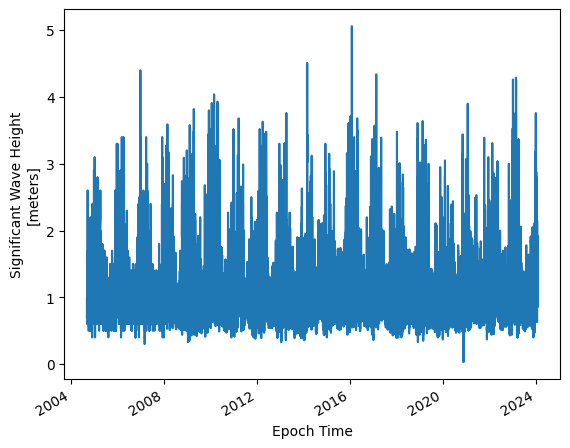

In [ ]:
ds.wave_height.squeeze().plot()

Convert Significant Wave Height to units of feet

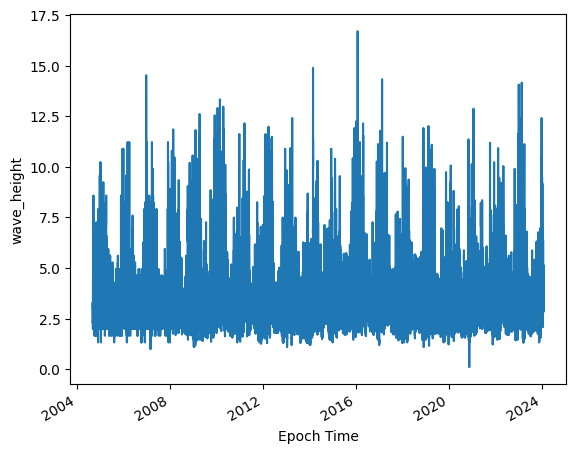

In [ ]:
wave_height_feet = ds.wave_height*3.3
wave_height_feet.plot()

Turn back numpy array to an xarray array.

In [ ]:
da = xr.DataArray(
            data=DPD,
            dims=["time"],
            coords=dict(
            time=ds.time,
            ),
            attrs=dict(
            description="Dominant Wave Period",
            units="s",
            ),
        )

This enables us to easily calculate the climatology using xarray

In [ ]:
DPDclim = da.groupby('time.month').mean('time')
DPDclim

<xarray.DataArray (month: 12)>
array([13.15718652, 12.51850215, 12.70441945, 12.67203819, 12.8741201 ,
       13.4423593 , 13.40781439, 12.79034709, 13.3314189 , 13.31954885,
       12.3371226 , 12.43700827])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    description:  Dominant Wave Period
    units:        s

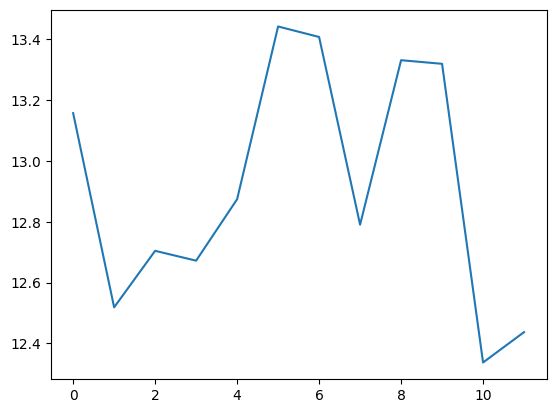

In [ ]:
plt.plot(DPDclim)

Find all significant wave heights greater than 25 ft.

In [ ]:
indx = np.where(np.array(wave_height_feet) > 25)[0]
wave_height_feet.time[indx]

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time

In [ ]:
H13clim = wave_height_feet.groupby('time.month').mean('time').squeeze()

H13clim

<xarray.DataArray 'wave_height' (month: 12)>
dask.array<getitem, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

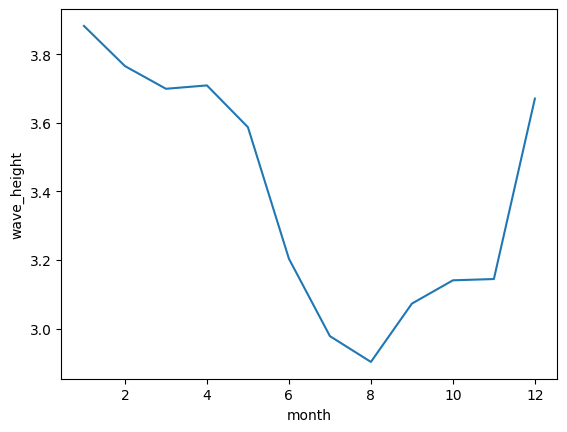

In [ ]:
H13clim.plot()

Energy Flux

$c_gE = \frac{\rho g^2}{32 \pi}TH^2_{1/3}$

In [ ]:
rho = 1e3
g = 9.81
Eflux = rho*g/(32*np.pi)*DPDclim*(H13clim/3.3)**2

Text(0, 0.5, 'Wave Energy Flux [kW m$^{-1}$]')

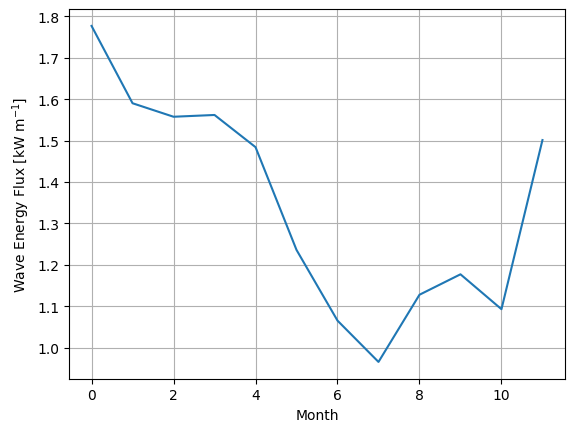

In [ ]:
plt.plot(Eflux/1e3)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Wave Energy Flux [kW m$^{-1}$]')

In [ ]:
nsites = len(buoys)
sig_wave_height_clim = np.nan*np.ones((12, nsites))
period_clim = np.nan*np.ones((12, nsites))
for n in range(nsites):
  urls = ndbc_buoy_urls(buoys[n])
  ds = xr.open_mfdataset(urls, drop_variables=["latitude", "longitude"])
  wave_height_feet = ds.wave_height*3.3
  sig_wave_height_clim[:, n] = wave_height_feet.groupby('time.month').mean('time').squeeze()

  DPD = np.array(ds.dominant_wpd.squeeze()).astype(float)/1e9
  indx = np.where(DPD < 0)[0]
  DPD[indx] = np.nan

  da = xr.DataArray(
            data=DPD,
            dims=["time"],
            coords=dict(
            time=ds.time,
            ),
            attrs=dict(
            description="Dominant Wave Period",
            units="s",
            ),
        )

  period_clim[:, n] = da.groupby('time.month').mean('time')


Text(0.5, 1.0, 'Significant Wave Height Climatology')

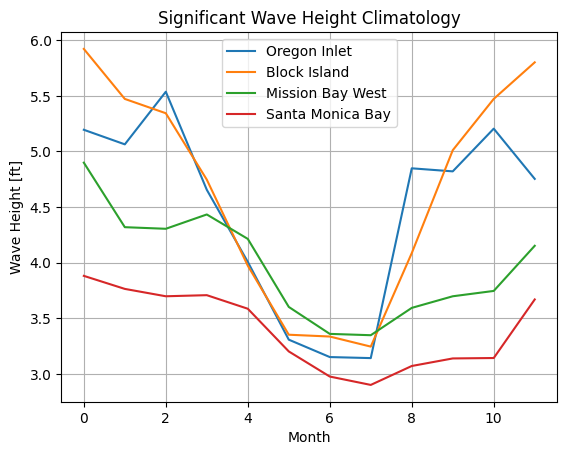

In [ ]:
# plt.subplot(221)
plt.plot(sig_wave_height_clim)
plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Wave Height [ft]')
plt.title('Significant Wave Height Climatology')

Text(0.5, 1.0, 'Dominant Wave Period Climatology')

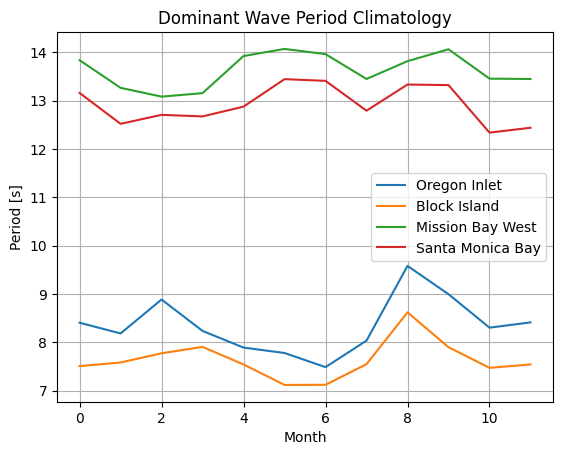

In [ ]:
plt.plot(period_clim)
plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Period [s]')
plt.title('Dominant Wave Period Climatology')

In [ ]:
Eflux_clim = rho*g/(32*np.pi)*period_clim*(sig_wave_height_clim/3.3)**2

Text(0.5, 1.0, 'Wave Energy Flux Climatology')

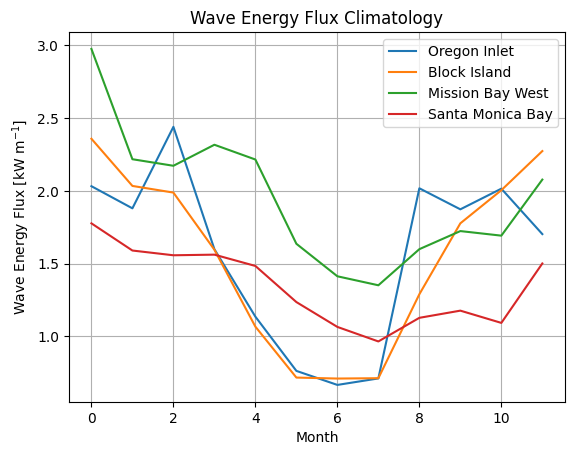

In [ ]:
plt.plot(Eflux_clim/1e3)
plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Wave Energy Flux [kW m$^{-1}$]')
plt.title('Wave Energy Flux Climatology')

Text(0.5, 1.0, 'Wave Energy Flux Climatology')

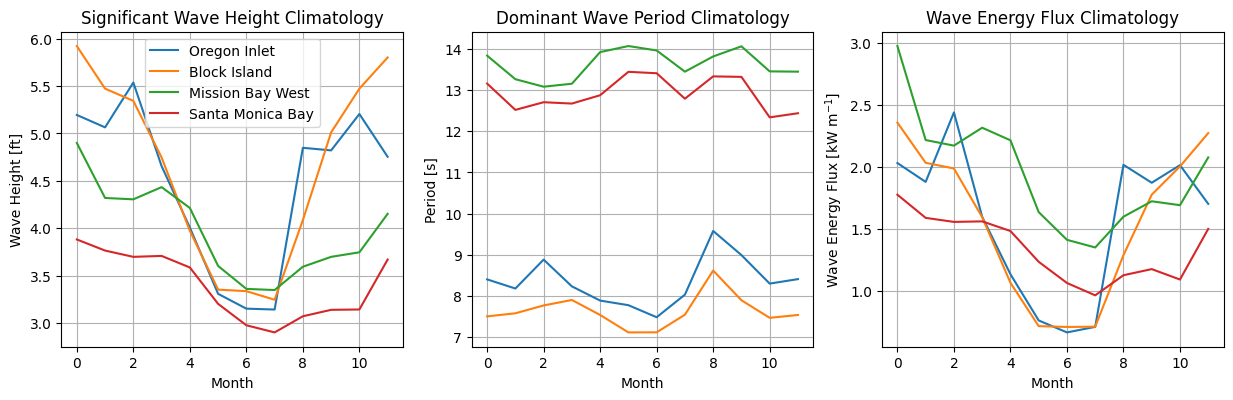

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)

plt.subplot(231)
plt.plot(sig_wave_height_clim)
plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Wave Height [ft]')
plt.title('Significant Wave Height Climatology')

plt.subplot(232)
plt.plot(period_clim)
# plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Period [s]')
plt.title('Dominant Wave Period Climatology')

plt.subplot(233)
plt.plot(Eflux_clim/1e3)
# plt.legend(station_name)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Wave Energy Flux [kW m$^{-1}$]')
plt.title('Wave Energy Flux Climatology')